#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### Load Data

In [2]:
df= pd.read_csv("C:/Users/DELL/Downloads/online_transaction.csv")
df.head()

,Order ID,Order Date,Customer Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Total Sale,Sales Channel,Returned?
0,ORD107790,2023-10-23,East,Laptop,Lenovo ThinkPad,7,899,0.0,6293.0,Online,NaN
1,ORD113280,2023-12-29,North,Laptop,HP Spectre,1,1249,10.0,NaN,Online,Yes
2,ORD117500,2023-10-28,SOUTH,Laptop,MacBook Air,6,999,10.0,5394.6,RETAIL,no
3,ORD123643,2023-02-12,East,Smartphone,OnePlus 11,1,729,0.0,729.0,Retail,NaN
4,ORD128127,2023-12-04,north,Laptop,HP Spectre,2,1249,5.0,2373.1,RETAIL,NaN


####  Data Profiling

In [3]:
shape= df.shape
column_view= df.info()
duplicate_check= df.duplicated().sum()
#Unique value in columns
region= df['Customer Region'].unique()
product_category= df['Product Category'].unique()
product= df['Product Name'].unique()
sales_channel= df['Sales Channel'].unique()
print('Region:',region)
print('Product Category:',product_category)
print('Product:',product)
print('Sales Channel:',sales_channel)
print('Shape:',shape)
print(column_view)
print('Duplicates:',duplicate_check)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          482 non-null    object 
 1   Order Date        470 non-null    object 
 2   Customer Region   482 non-null    object 
 3   Product Category  482 non-null    object 
 4   Product Name      482 non-null    object 
 5   Quantity Sold     482 non-null    int64  
 6   Unit Price        482 non-null    int64  
 7   Discount (%)      475 non-null    float64
 8   Total Sale        426 non-null    float64
 9   Sales Channel     482 non-null    object 
 10  Returned?         325 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 41.6+ KB
Region: ['East' 'North' 'SOUTH' 'north' 'west' '0']
Product Category: ['Laptop' 'Smartphone' 'Smartwatch' 'Headphones' '0']
Product: ['Lenovo ThinkPad' 'HP Spectre' 'MacBook Air' 'OnePlus 11'
 'Garmin Forerunner' 'Galaxy 

* Null Check

In [4]:
df.isnull().sum()

Order ID              0
Order Date           12
Customer Region       0
Product Category      0
Product Name          0
Quantity Sold         0
Unit Price            0
Discount (%)          7
Total Sale           56
Sales Channel         0
Returned?           157
dtype: int64

#### Data Wrangling & Transformation

In [5]:
# Correcting nulls in dates
df ['Order Date'] = df['Order Date'].fillna ('2023-01-24')
df['Order Date']= df['Order Date'].replace('0','2023-01-24')
# convert feature to datetime
df['Order Date']= pd.to_datetime(df['Order Date'],errors='coerce')
df ['Order Date'] = df['Order Date'].fillna ('2023-01-24')
df['Discount (%)']= df['Discount (%)'].fillna(df['Discount (%)'].mean())
df['Total Sale']= df['Total Sale'].fillna(df['Total Sale'].mean())
df['Returned?']= df['Returned?'].fillna('Unspecified')
df.isna().sum()
# Drop Total Sale to derive accurate results for each sales transaction
df.drop(['Total Sale'], axis=1, inplace=True)
# Modifying values
region= df['Customer Region'].unique()
product_category= df['Product Category'].unique()
product= df['Product Name'].unique()
sales_channel= df['Sales Channel'].unique()
returned= df['Returned?'].unique()
# Null Review
null_review= df.isnull().sum()
print('Region:',region)
print('Product Category:',product_category)
print('Product:',product)
print('Sales Channel:',sales_channel)
print('Returned:',returned)
null_review

Region: ['East' 'North' 'SOUTH' 'north' 'west' '0']
Product Category: ['Laptop' 'Smartphone' 'Smartwatch' 'Headphones' '0']
Product: ['Lenovo ThinkPad' 'HP Spectre' 'MacBook Air' 'OnePlus 11'
 'Garmin Forerunner' 'Galaxy S22' 'Fitbit Versa' 'Beats Studio3' 'Pixel 7'
 'AirPods Pro' 'iPhone 14' 'Sony WH-1000XM4' 'Apple Watch' 'Galaxy Watch'
 'Dell XPS 13' 'Bose QC45' '0']
Sales Channel: ['Online' 'RETAIL' 'Retail' 'onlne' 'Partner' '0']
Returned: ['Unspecified' 'Yes' 'no' 'yes' 'No' '0']


Order ID            0
Order Date          0
Customer Region     0
Product Category    0
Product Name        0
Quantity Sold       0
Unit Price          0
Discount (%)        0
Sales Channel       0
Returned?           0
dtype: int64

* Modifying Mispelt words

In [6]:

df ['Customer Region'] = df ['Customer Region'].replace(
    { 'SOUTH': 'South',
    'north': 'North',
    'west': 'West',
    '0': 'North'}
)
df ['Sales Channel'] = df ['Sales Channel'].replace(
    { 'RETAIL': 'Retail',
    'onlne': 'Online',
    #replaced 0 to Online
    0: 'Online'}
)
df['Returned?']= df['Returned?']. replace(
    {'yes': 'Yes',
     # replacing 0 as No
     'no': 'No',
     '0': 'Unspecified'}
)
region= df['Customer Region'].unique()
sales_channel= df['Sales Channel'].unique()
returned= df['Returned?'].unique()
print('Region:',region)
print('Sales Channel:',sales_channel)
print('Returned:',returned)
df.head()


Region: ['East' 'North' 'South' 'West']
Sales Channel: ['Online' 'Retail' 'Partner' '0']
Returned: ['Unspecified' 'Yes' 'No']


,Order ID,Order Date,Customer Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Sales Channel,Returned?
0,ORD107790,2023-10-23,East,Laptop,Lenovo ThinkPad,7,899,0.0,Online,Unspecified
1,ORD113280,2023-12-29,North,Laptop,HP Spectre,1,1249,10.0,Online,Yes
2,ORD117500,2023-10-28,South,Laptop,MacBook Air,6,999,10.0,Retail,No
3,ORD123643,2023-02-12,East,Smartphone,OnePlus 11,1,729,0.0,Retail,Unspecified
4,ORD128127,2023-12-04,North,Laptop,HP Spectre,2,1249,5.0,Retail,Unspecified


#### Data Enrichment

In [7]:
# Renaming Columns
df.rename(
    columns = { 'Order ID': 'OrderID',
    'Order Date': 'OrderDate',
    'Customer Region': 'Region',
    'Product Category': 'ProductCategory',
    'Product Name' :'Product',
    'Quantity Sold': 'Quantity',
    'Unit Price': 'UnitPrice',
    'Discount (%)': 'DiscountPercentage',
    'Sales Channel': 'SalesChannel',
    'Returned?': 'Returned' },
    inplace = True
)
# Deriving Year & Month
df['Year']= df['OrderDate'].dt.year
df['MonthNum']= df['OrderDate'].dt.month
#Deriving quarter
condition= [
    (df['MonthNum']<=3),
    (df['MonthNum']>=4) & (df['MonthNum'] <=6),
    (df['MonthNum']>=7) & (df['MonthNum']<=9),
    (df['MonthNum']>9)
]
ouptut= ['Q1','Q2','Q3','Q4']
df['Quarter']= np.select(condition,ouptut)
#Deriving month
df['Month']= df['OrderDate'].dt.month_name()
# Total Sales
df['Revenue']= df['Quantity'] * df['UnitPrice']
# Discount Sales
df['DiscountSales']= df['Revenue'] * (1- df['DiscountPercentage'] / 100)
# Discount Amount
df['DiscountAmount']= df['Revenue'] * (df['DiscountPercentage'] * 100)
#Flags discounted product
df['IsDiscounted']= np.where(df['DiscountPercentage']>0,'Yes','No')
#Reorder Feauture
df = df [['OrderID','OrderDate','Year',
          'MonthNum','Month','Quarter',
          'Region','ProductCategory','Product',
          'Quantity','UnitPrice','DiscountPercentage',
          'IsDiscounted','Revenue','DiscountSales',
          'DiscountAmount','SalesChannel','Returned'
        ]]
df.columns

Index(['OrderID', 'OrderDate', 'Year', 'MonthNum', 'Month', 'Quarter',
       'Region', 'ProductCategory', 'Product', 'Quantity', 'UnitPrice',
       'DiscountPercentage', 'IsDiscounted', 'Revenue', 'DiscountSales',
       'DiscountAmount', 'SalesChannel', 'Returned'],
      dtype='object')

 #### Data Analysis & Data Visualization

* Product Return Insight

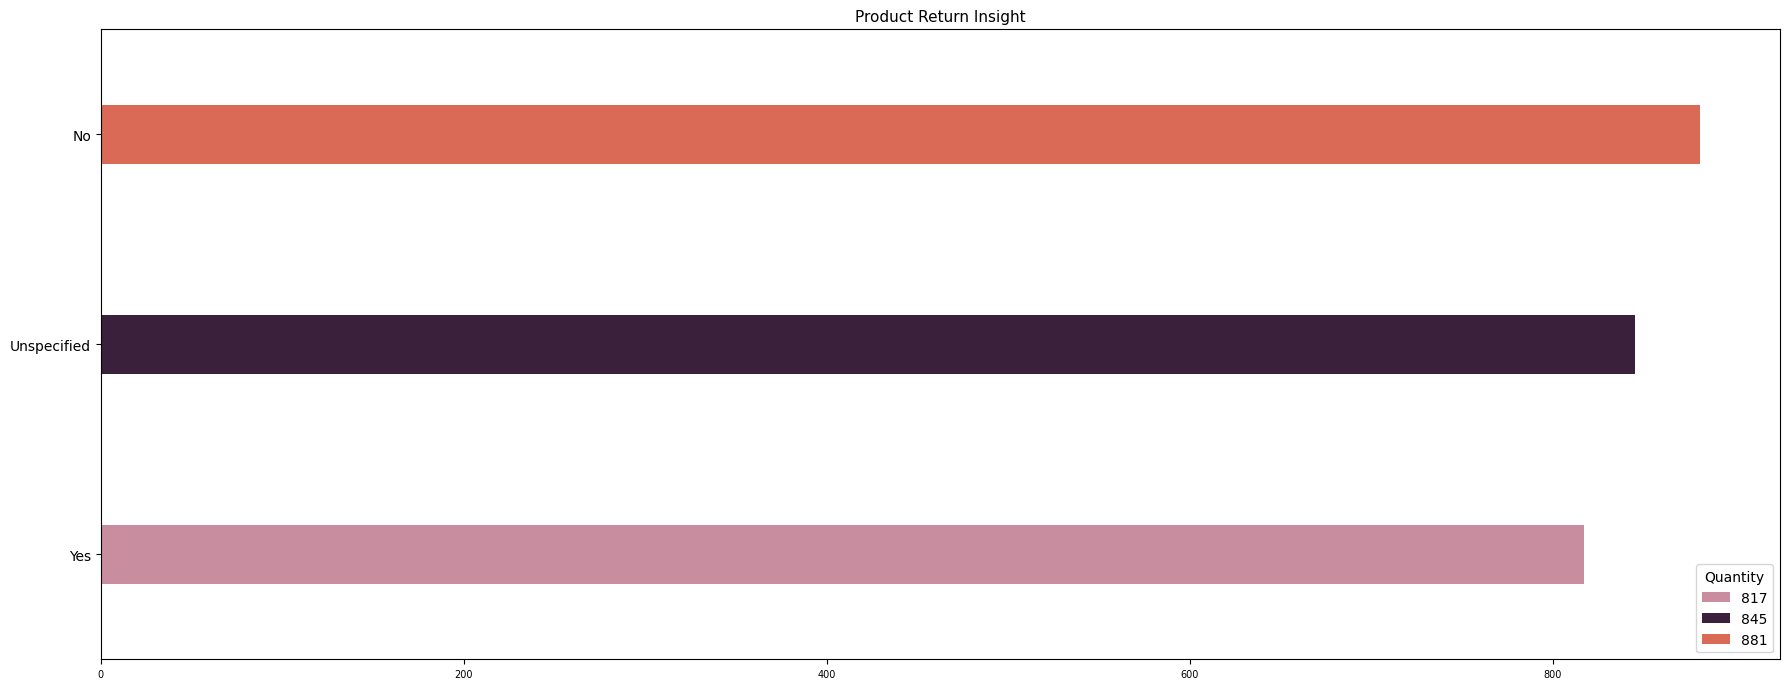

In [8]:
sales_return_insight= df.groupby('Returned')['Quantity'].sum().sort_values(ascending=False).reset_index()
# Plot a chart to show insight
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=sales_return_insight,
    x='Quantity',
    y='Returned',
    hue='Quantity',
    palette=["#D2839B","#3F1C3F","#F05A3F"]
)
for bar in ax.patches:
    height= bar.get_height()
    y= bar.get_y()
    bar.set_height(height * 0.35) #reduced with by 40%
    bar.set_y(y + (height - bar.get_height())/2)
plt.title('Product Return Insight',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=7)
plt.tight_layout()
plt.show()

* Total Revenue across Sales Channel

In [9]:
#Total Revenue across Sales Channel
no_returned= df[df['Returned']=='No']
revenue_by_channel= no_returned.groupby('SalesChannel')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_channel

,SalesChannel,Revenue
0,Retail,269066
1,Online,170637
2,Partner,85671


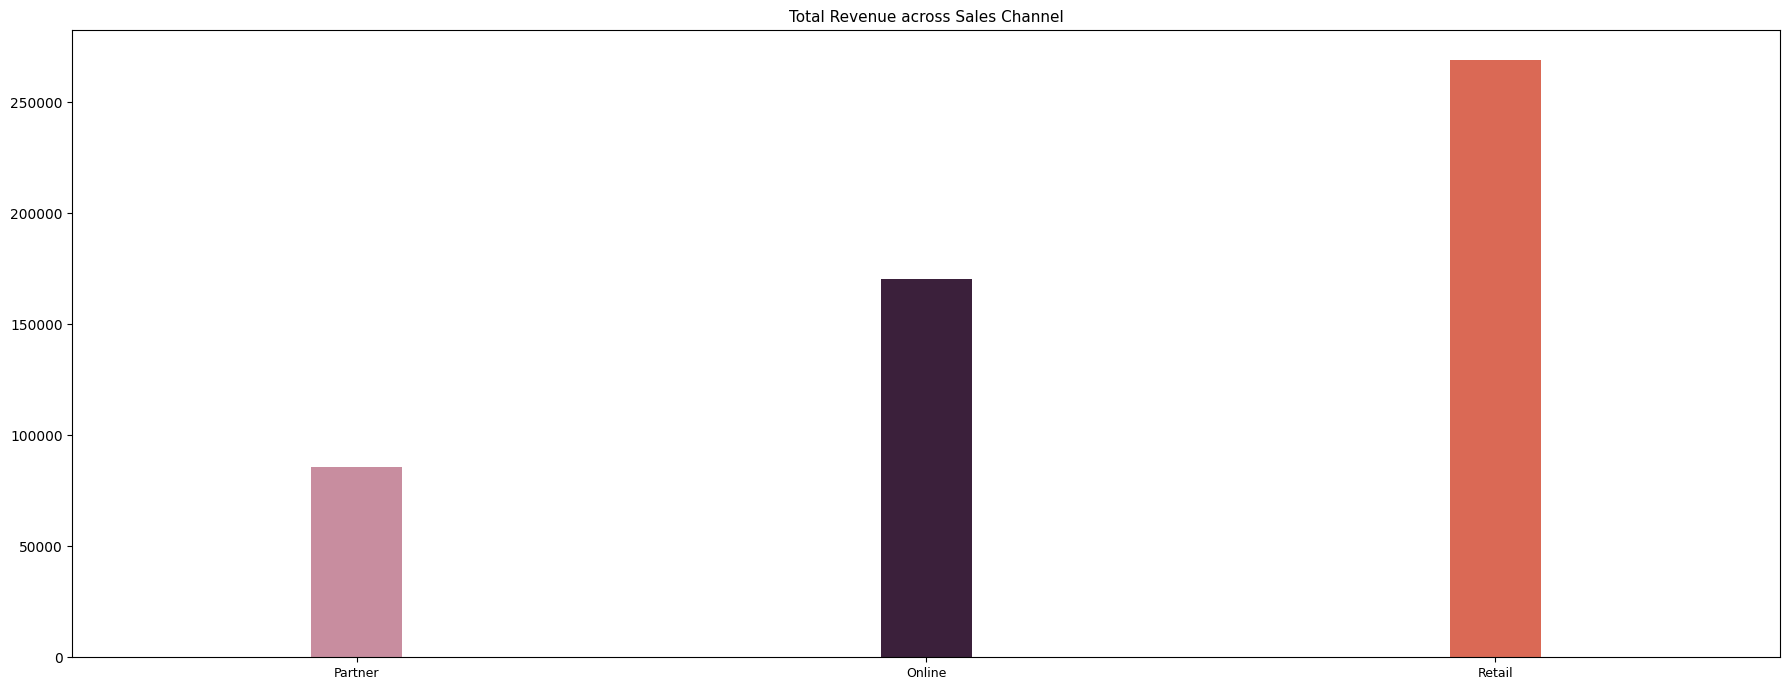

In [10]:
#Plot the chart
sales_summary= no_returned.groupby('SalesChannel')['Revenue'].sum().sort_values(ascending=True).reset_index()
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=sales_summary,
    x='SalesChannel',
    y='Revenue',
    hue='SalesChannel',
    palette=["#D2839B","#3F1C3F","#F05A3F"]
) #Adjust bar width
for bar in ax.patches:
    width= bar.get_width()
    x= bar.get_x()
    bar.set_width(width * 0.2) #reduce with by 20%
    bar.set_x( x + (width - bar.get_width())/2)
plt.title('Total Revenue across Sales Channel',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

* Quarterly Revenue

In [11]:
#Quarterly Sales Trend
no_returned= df[df['Returned']=='No']
sales_trend= no_returned.groupby(['Year','Quarter'])['Revenue'].sum().reset_index()
sales_trend

,Year,Quarter,Revenue
0,2023,Q1,127304
1,2023,Q2,157253
2,2023,Q3,109103
3,2023,Q4,128118
4,2024,Q1,3596


* Monthly Sales Trend

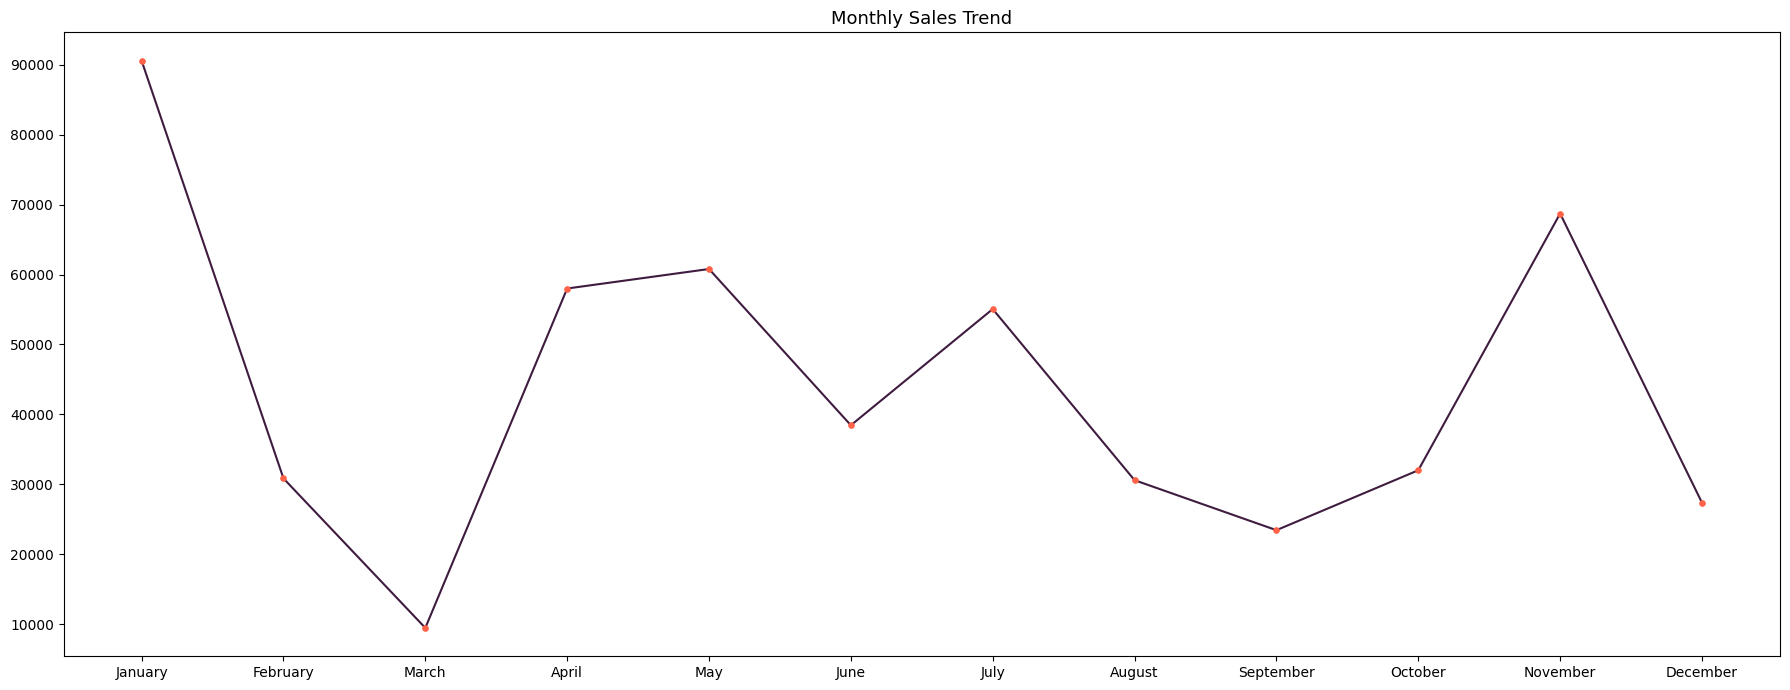

In [12]:
revenue_trend= no_returned.groupby(['Month','MonthNum'])['Revenue'].sum().reset_index()
revenue_trend= revenue_trend.sort_values('MonthNum')
# Plot Chart               
plt.figure(figsize=(18,7))
sns.lineplot(data=revenue_trend,
            x='Month',y='Revenue',
             color="#3F1C3F",
             marker='o',
             markersize=4,
             markerfacecolor='tomato',
             markeredgecolor='tomato'
)
plt.title("Monthly Sales Trend",fontsize=13)
plt.xlabel("")
plt.ylabel("")  
plt.tight_layout()
plt.show()

 ##### Regional Performance

* Regional Sales

In [13]:
#Regional Sales
regional_sales= no_returned.groupby('Region')['Revenue'].sum().sort_values(ascending=False).reset_index()
regional_sales

,Region,Revenue
0,North,243329
1,East,149774
2,South,70503
3,West,61768


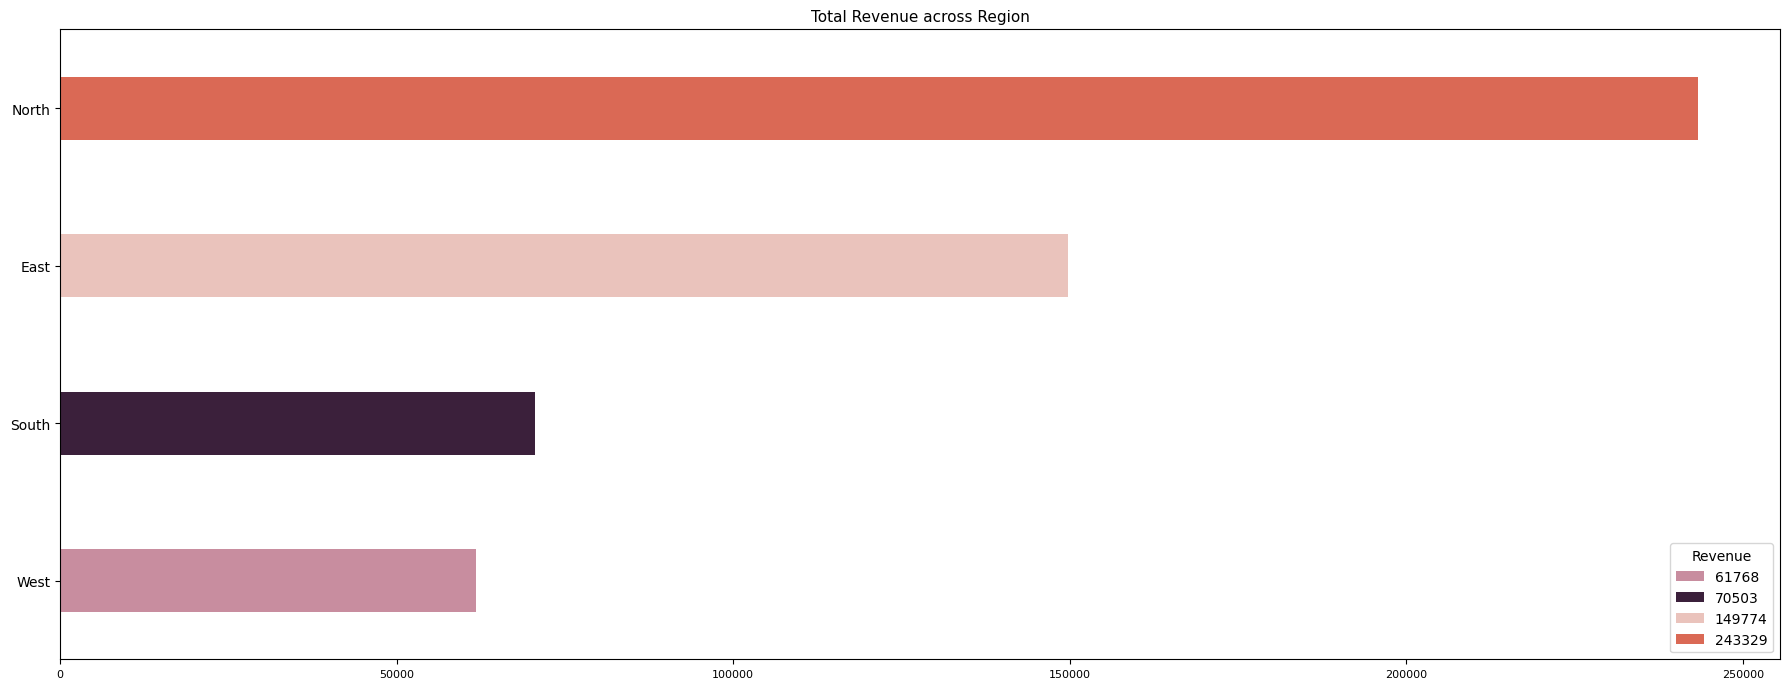

In [14]:
# Plot a bar chart to display insight
regional_sales= no_returned.groupby('Region')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=regional_sales,
    x='Revenue',
    y='Region',
    hue='Revenue',
    palette=["#D2839B","#3F1C3F","#F2BDB4","#F05A3F"]
)
for bar in ax.patches:
    height= bar.get_height()
    y= bar.get_y()
    bar.set_height(height * 0.5) #reduced with by 50%
    bar.set_y(y + (height - bar.get_height())/2)
plt.title('Total Revenue across Region',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

* Regional Demand

In [15]:
#Regional Demand
regional_demand= no_returned.groupby('Region')['Quantity'].sum().sort_values(ascending=False).reset_index()
regional_demand

,Region,Quantity
0,North,394
1,East,267
2,South,115
3,West,105


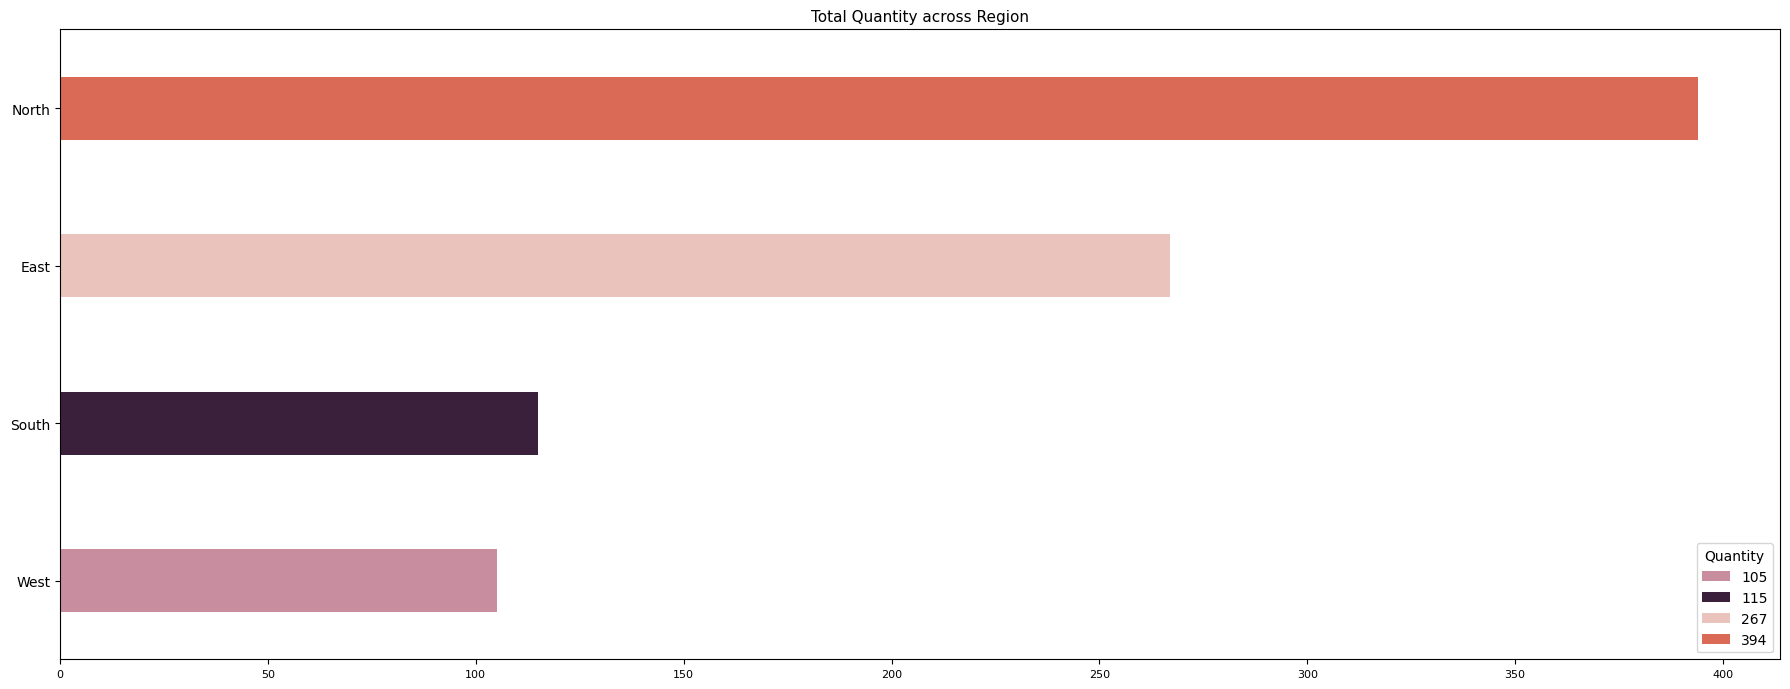

In [16]:
# Plot a bar chart to display insight
regional_demand= no_returned.groupby('Region')['Quantity'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=regional_demand,
    x='Quantity',
    y='Region',
    hue='Quantity',
    palette=["#D2839B","#3F1C3F","#F2BDB4","#F05A3F"]
)
for bar in ax.patches:
    height= bar.get_height()
    y= bar.get_y()
    bar.set_height(height * 0.5) #reduced with by 50%
    bar.set_y(y + (height - bar.get_height())/2)
plt.title('Total Quantity across Region',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

* Demand Trend

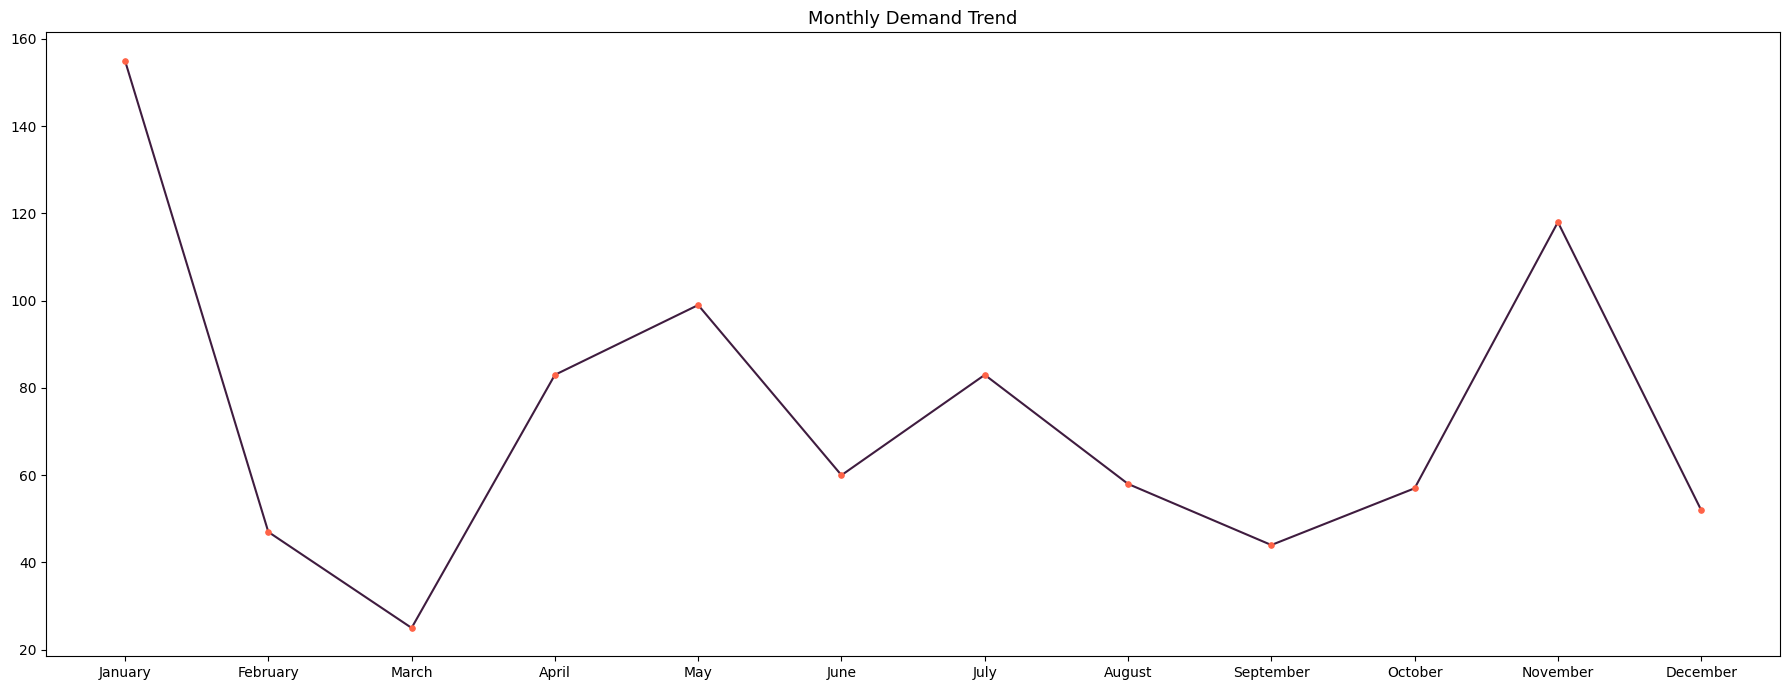

In [17]:
demand_trend= no_returned.groupby(['Month','MonthNum'])['Quantity'].sum().reset_index()
demand_trend= demand_trend.sort_values('MonthNum')
# Plot Chart               
plt.figure(figsize=(18,7))
sns.lineplot(data= demand_trend,
            x='Month',y='Quantity',
             color="#3F1C3F",
             marker='o',
             markersize=4,
             markerfacecolor='tomato',
             markeredgecolor='tomato'
)
plt.title("Monthly Demand Trend",fontsize=13)
plt.xlabel("")
plt.ylabel("")  
plt.tight_layout()
plt.show()

* Are discounted products signifincantly contributing to total sales?

In [18]:
sales_summary= no_returned.groupby('IsDiscounted')['Revenue'].sum().sort_values(ascending=False).reset_index()
sales_summary

,IsDiscounted,Revenue
0,Yes,433807
1,No,91567


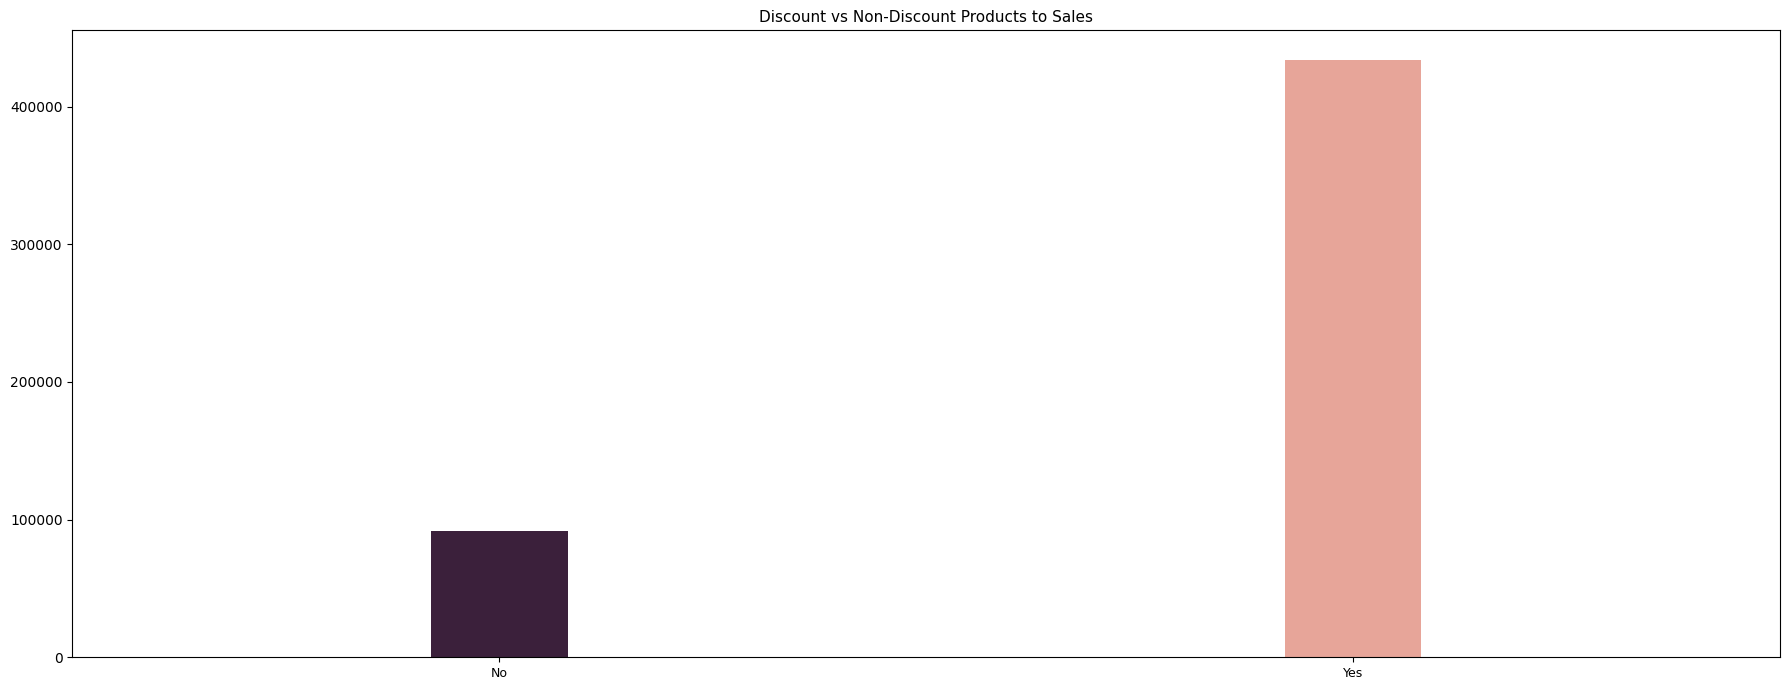

In [19]:
#Plot the chart
sales_summary= no_returned.groupby('IsDiscounted')['Revenue'].sum().reset_index()
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=sales_summary,
    x='IsDiscounted',
    y='Revenue',
    hue='IsDiscounted',
    palette=["#3F1C3F","#F49C8C"]
) #Adjust bar width
for bar in ax.patches:
    width= bar.get_width()
    x= bar.get_x()
    bar.set_width(width * 0.2) #reduce with by 20%
    bar.set_x( x + (width - bar.get_width())/2)
plt.title('Discount vs Non-Discount Products to Sales',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

 ##### Product Insight

* Total Revenue by Product Category

In [20]:
product_ctg= no_returned.groupby('ProductCategory')['Revenue'].sum().reset_index()
product_ctg

,ProductCategory,Revenue
0,Headphones,56723
1,Laptop,260648
2,Smartphone,126921
3,Smartwatch,81082


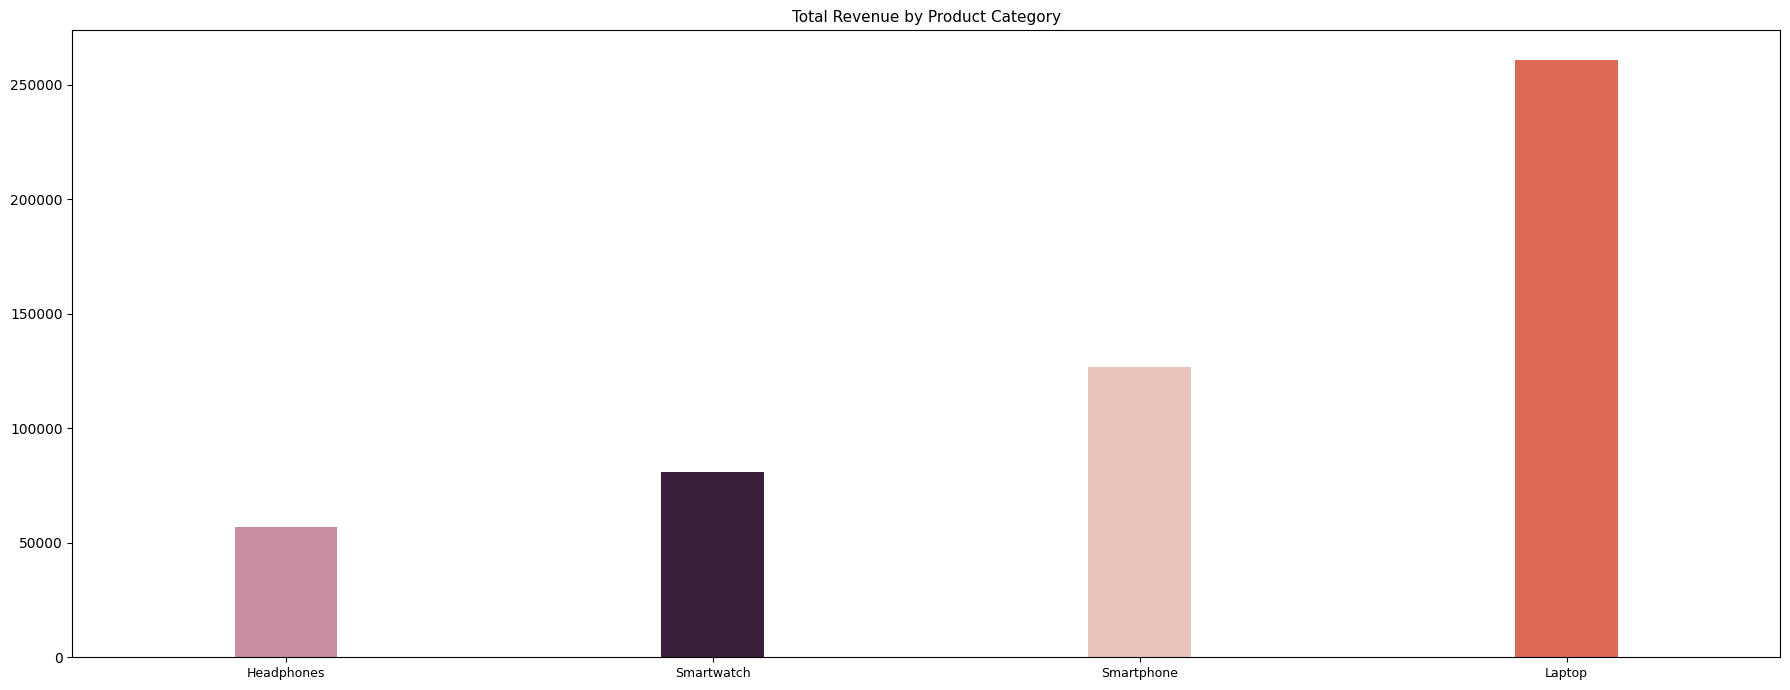

In [21]:
product_ctg= no_returned.groupby('ProductCategory')['Revenue'].sum().sort_values(ascending=True).reset_index()
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=product_ctg,
    x='ProductCategory',
    y='Revenue',
    hue='ProductCategory',
    palette=["#D2839B","#3F1C3F","#F2BDB4","#F05A3F"]
)
for bar in ax.patches:
    width= bar.get_width()
    x= bar.get_x()
    bar.set_width(width * 0.3) #reduced with by 30%
    bar.set_x(x + (width - bar.get_width())/2)
plt.title('Total Revenue by Product Category',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

* Top 5 Product by Revenue

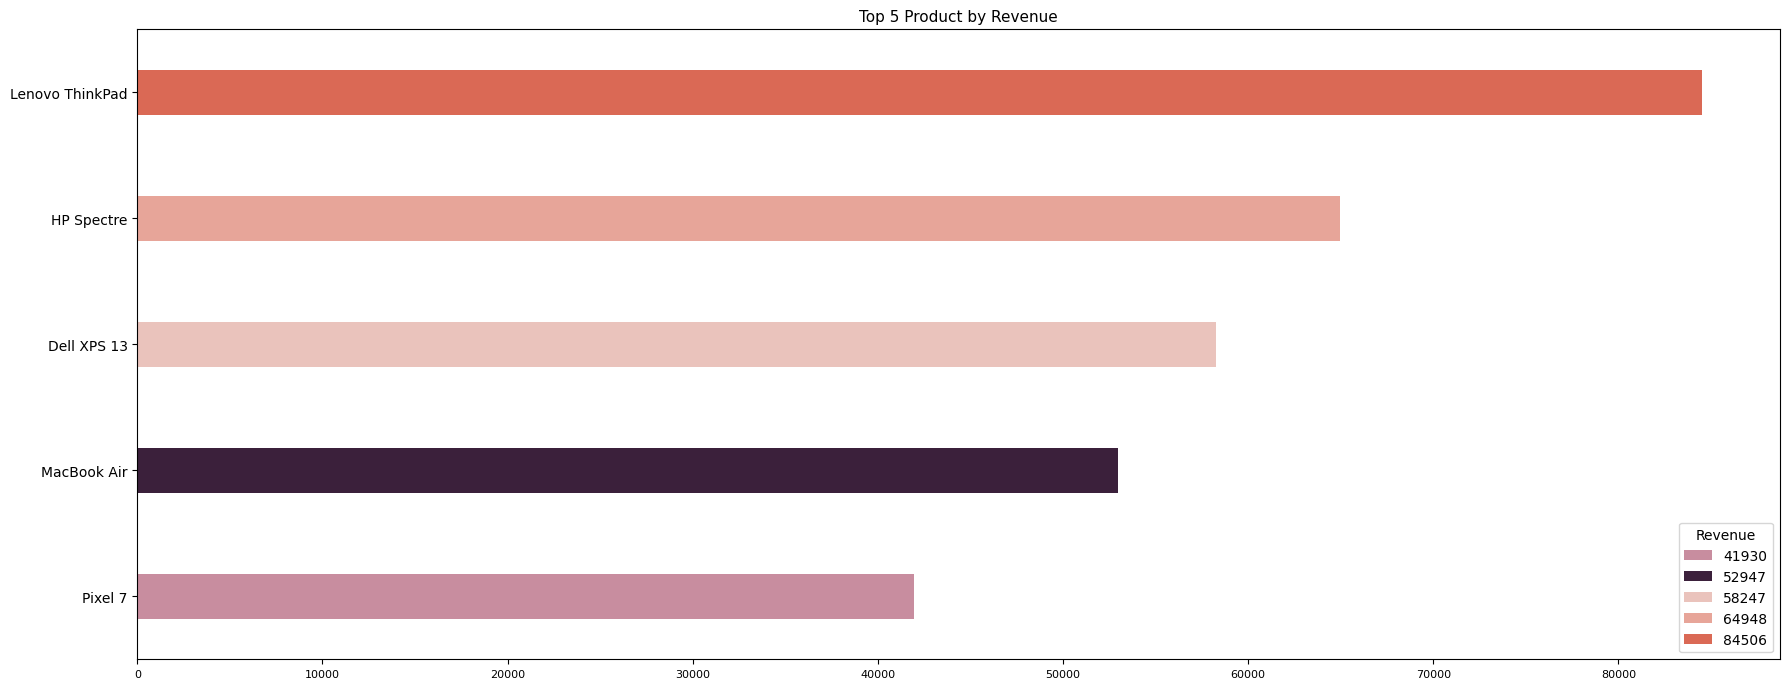

In [22]:
top_5_products= no_returned.groupby('Product')['Revenue'].sum().reset_index()
top_5_products= top_5_products.sort_values(by='Revenue',ascending=False).head(5)
top_5_products
# Plot Chart
plt.figure(figsize=(18,7))
ax= sns.barplot(
    data=top_5_products,
    x='Revenue',
    y='Product',
    hue='Revenue',
    palette=["#D2839B","#3F1C3F","#F2BDB4","#F49C8C","#F05A3F"]
)
for bar in ax.patches:
    height= bar.get_height()
    y= bar.get_y()
    bar.set_height(height * 0.45) #reduced with by 45%
    bar.set_y(y + (height - bar.get_height())/2)
plt.title('Top 5 Product by Revenue',fontsize=11)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

* Correlation Analysis

In [23]:
# import library
from sklearn.preprocessing import LabelEncoder
# correlation analysis
for col in df.select_dtypes(include=['object','category']).columns:
    le= LabelEncoder()
    df[col]= le.fit_transform(df[col])
# High correlated features
corr_matrix= df.corrwith(df['Revenue']).sort_values(ascending=False).head(6)
print(corr_matrix)

Revenue           1.000000
DiscountSales     0.992726
UnitPrice         0.689818
DiscountAmount    0.682274
Quantity          0.641382
Product           0.284875
dtype: float64


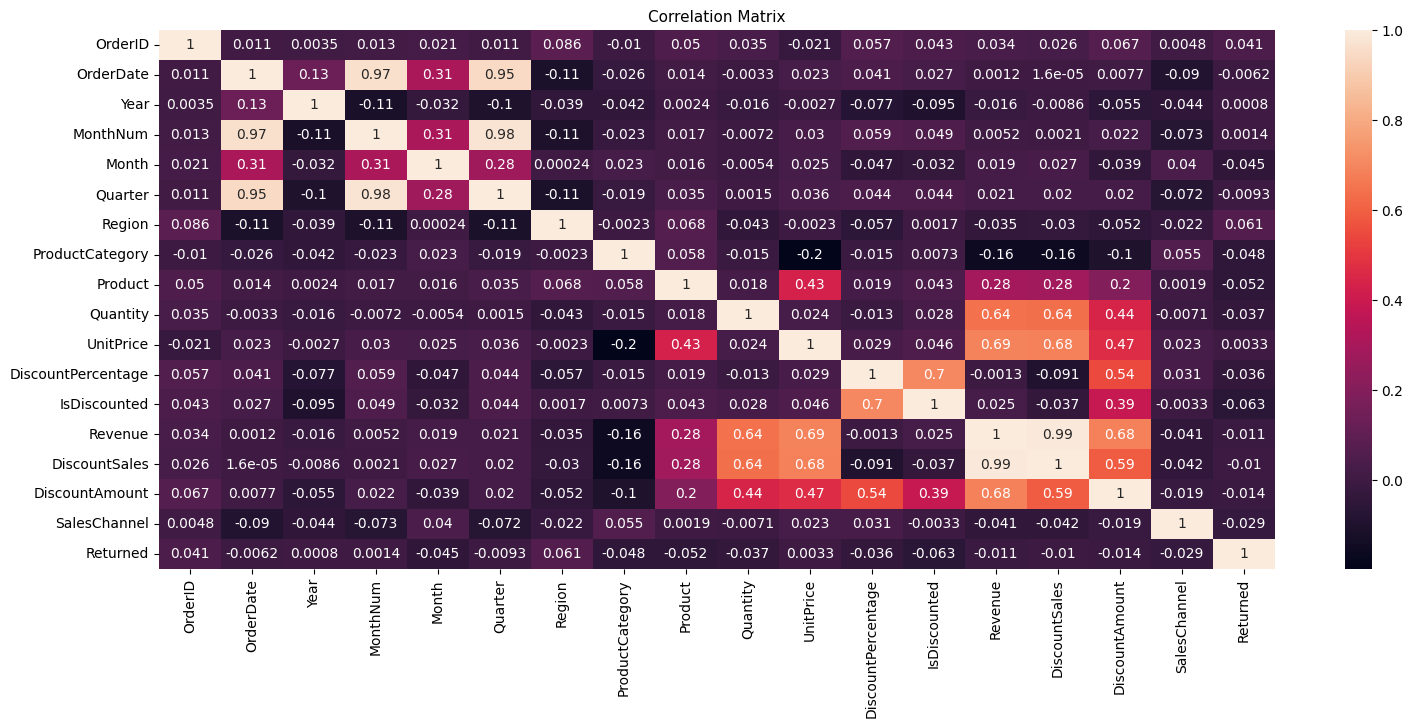

In [24]:
# plot the chart
plt.figure(figsize=(18,7))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix",fontsize=11)
plt.show()